In [1]:
import yfinance as yf
import pandas as pd

In [2]:
indices = {
    'NIFTY FIFTY': '^NSEI',
    'Nifty Auto': '^CNXAUTO',
    'Nifty FMCG': '^CNXFMCG',
    'Nifty IT': '^CNXIT',
    'Nifty Media': '^CNXMEDIA',
    'Nifty Metal': '^CNXMETAL',
    
    'Nifty Realty': '^CNXREALTY'
}


In [3]:
period = '10y'

In [4]:
data = {}
for name, symbol in indices.items():
    data[name] = yf.download(symbol, period=period)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
nifty_data = pd.concat({k: v['Adj Close'] for k, v in data.items()}, axis=1)
nifty_data.columns = list(data.keys())

In [6]:
nifty_data.head()

,NIFTY FIFTY,Nifty Auto,Nifty FMCG,Nifty IT,Nifty Media,Nifty Metal,Nifty Realty
Date,,,,,,,
2014-05-26,7359.049805,6502.000000,17736.900391,9061.000000,1898.199951,3149.750000,241.050003
2014-05-27,7318.000000,6435.649902,17713.900391,9101.849609,1904.949951,3155.649902,238.149994
2014-05-28,7329.649902,6374.750000,17698.550781,9237.250000,1890.900024,3111.000000,241.250000
2014-05-29,7235.649902,6375.250000,17621.699219,8927.400391,1903.099976,3083.850098,238.350006
2014-05-30,7229.950195,6385.100098,17831.599609,8970.299805,1951.300049,3096.899902,242.949997


In [7]:


macro_df = pd.read_csv(r"C:\Users\ACER\Downloads\india-inflation-rate-cpi.csv")


In [8]:

macro_df = pd.DataFrame(macro_df)

In [16]:

macro_df['Date'] = pd.to_datetime(macro_df['Date'] , format='%Y-%m-%d')

In [17]:
print(macro_df.head())

        Date   Inflation Rate (%)   GDP ( Billions of US $)
0 1960-12-31               1.7799                 37.029884
1 1961-12-31               1.6952                 39.232436
2 1962-12-31               3.6322                 42.161482
3 1963-12-31               2.9462                 48.421923
4 1964-12-31              13.3553                 56.480290


In [18]:
datai= pd.merge(nifty_data, macro_df, on='Date')

In [19]:
print(datai.head())


        Date   NIFTY FIFTY   Nifty Auto    Nifty FMCG      Nifty IT  \
0 2014-12-31   8282.700195  8281.200195  20126.199219  11216.299805   
1 2015-12-31   7946.350098  8254.750000  20192.650391           NaN   
2 2018-12-31  10862.549805  9235.549805  30516.650391  14440.299805   
3 2019-12-31  12168.450195  8248.299805  30121.500000  15652.400391   
4 2020-12-31  13981.750000  9193.500000  34177.101562  24251.349609   

   Nifty Media  Nifty Metal  Nifty Realty   Inflation Rate (%)  \
0  2387.100098  2661.050049    203.100006               6.6657   
1  2633.000000  1826.849976    172.600006               4.9070   
2  2566.199951  3154.600098    232.350006               3.9388   
3  1803.599976  2801.300049    298.549988               3.7295   
4  1648.949951  3254.649902    313.850006               6.6234   

    GDP ( Billions of US $)  
0               2039.126479  
1               2103.588360  
2               2702.929642  
3               2835.606257  
4               2671.59540

In [25]:
extended_macro_data = macro_df.copy()
extended_macro_data['Date'] = extended_macro_data['Date'] + pd.DateOffset(years=1)


In [28]:
combined_data = pd.merge(nifty_data, extended_macro_data, on='Date', how='inner')

In [30]:
for col in combined_data.columns:
    if combined_data[col].dtype == 'object' and col != 'Date':
        combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')


In [34]:
combined_data = combined_data.dropna()

In [35]:
features = [' GDP ( Billions of US $)', ' Inflation Rate (%)']
target = 'Nifty Auto'  # Predicting one of the Nifty indices as an example

In [37]:
combined_data.set_index('Date', inplace=True)


KeyError: "None of ['Date'] are in the columns"

In [39]:
endog = combined_data[target]
exog = combined_data[features]

In [40]:
train_endog = endog[:'2014']
test_endog = endog['2022':]

In [44]:
train_exog = exog[:'2014']
test_exog = exog['2022':]

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_endog, exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances w

In [46]:
pred = results.get_prediction(start=test_endog.index[0], end=test_endog.index[-1], exog=test_exog)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()


IndexError: index 0 is out of bounds for axis 0 with size 0

NameError: name 'pred_mean' is not defined

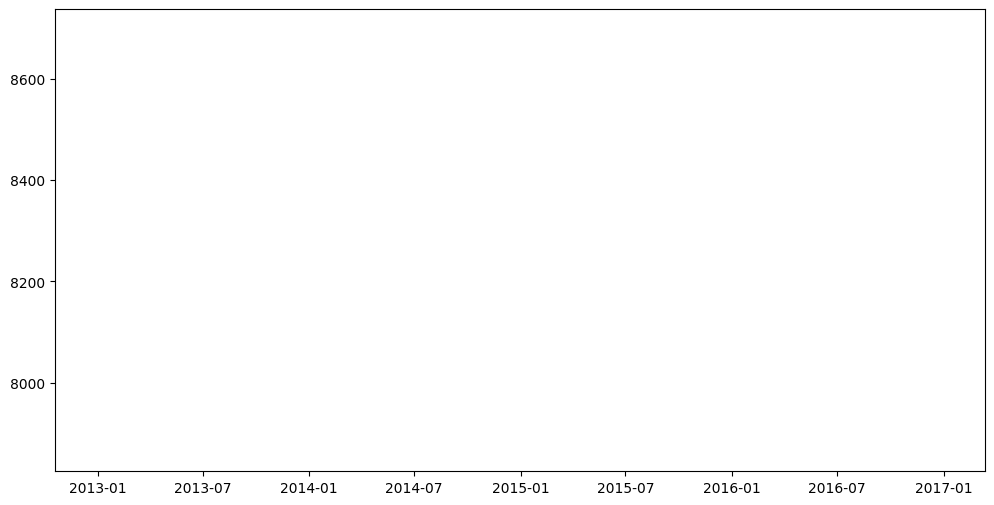

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_endog.index, train_endog, label='Train')
plt.plot(test_endog.index, test_endog, label='Test')
plt.plot(pred_mean.index, pred_mean, label='Predicted')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title('Nifty Auto Index Prediction')
plt.xlabel('Date')
plt.ylabel('Nifty Auto Index Value')
plt.show()

# Evaluate the model
test_forecast = pred.predicted_mean
mse = ((test_forecast - test_endog) ** 2).mean()
print(f'Test MSE: {mse}')

In [ ]:
#I tried incorporating the macroeconomic variables into the model by using a similar approach in a model like SARIMAX instead of ARIMA but ended up getting an index error and hence I could not figure out issue with the way data is being indexed or sliced.
#